## Dataset

This project uses the [BBC News Dataset](http://mlg.ucd.ie/datasets/bbc.html) from the Natural Language Processing Group at University College Dublin. The dataset contains 2,225 news articles evenly distributed across 5 categories (business, entertainment, politics, sport, technology).

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("bbc-news-data.csv", delimiter='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [17]:
df.describe()

,category,filename,title,content
count,2225,2225,2225,2225
unique,5,511,2096,2092
top,sport,386.txt,Troubled Marsh under SEC scrutiny,Music and film fans will be able to control t...
freq,511,5,2,2


# Data Cleaning

In [116]:
print("Total Duplicate Titles:", df.duplicated(subset=['title'], keep=False).sum().item())
print("Total Duplicate Contents:", df.duplicated(subset=['content'], keep=False).sum().item())

Total Duplicate Titles: 258
Total Duplicate Contents: 266


In [48]:
duplicate_titles = df[df.duplicated(subset=['title'], keep=False)]['title'].unique()
example_title = duplicate_titles[3]  # Pick the first duplicate title (or any other)
duplicate_rows = df[df['title'] == example_title]
duplicate_rows

,category,filename,title,content
259,business,260.txt,Asia shares defy post-quake gloom,"Indonesian, Indian and Hong Kong stock market..."
353,business,354.txt,Asia shares defy post-quake gloom,Thailand has become the first of the 10 south...


In [58]:
# Step 1: Find all duplicate content values (keep all occurrences)
duplicate_contents = df[df.duplicated(subset=['content'], keep=False)]

# Step 2: Group by 'content' and check if 'title' has more than one unique value
conflicts = duplicate_contents.groupby('content').filter(lambda x: x['title'].nunique() > 1)

# Step 3: Display the conflicting records (content with multiple titles)
conflicts.sort_values('content').reset_index(drop=True)

,category,filename,title,content
0,politics,383.txt,Labour accused of 'EU propaganda',"A ""taxpayer subsidised propaganda exercise"" o..."
1,politics,082.txt,Labour's 'EU propaganda',"A ""taxpayer subsidised propaganda exercise"" o..."
2,tech,333.txt,US woman sues over ink cartridges,"A US woman is suing Hewlett Packard (HP), say..."
3,tech,037.txt,US woman sues over cartridges,"A US woman is suing Hewlett Packard (HP), say..."
4,sport,328.txt,Umaga ready for Lions,All Blacks captain Tama Umaga has warned the ...
...,...,...,...,...
65,tech,287.txt,Text message record smashed,UK mobile owners continue to break records wi...
66,politics,343.txt,Labour's Cunningham to stand down,Veteran Labour MP and former Cabinet minister...
67,politics,236.txt,Jack Cunningham to stand down,Veteran Labour MP and former Cabinet minister...
68,sport,312.txt,Wales win in Rome,Wales secured their first away win in the RBS...


In [131]:
# Group by content and aggregate titles/categories
content_groups = df.groupby('content').agg({
    'title': lambda x: x.unique().tolist(), #save only unique titles
    'category': lambda x: x.unique().tolist() #save only unique categories
}).reset_index()
content_groups

,content,title,category
0,"""Do you have it in your heart? How much guts ...",[Connors' rallying cry for British tennis],[sport]
1,"""He's not finished yet,"" whispered the Conser...",[Howard's unfinished business],[politics]
2,"""Irreversible environmental damage"" will be c...",[Housing plans criticised by MPs],[politics]
3,'God games' in which players must control vir...,[Games help you 'learn and play'],[tech]
4,(after extra-time - score at 90 mins 1-1) Jo...,[Chelsea clinch cup in extra-time],[sport]
...,...,...,...
2087,Your child or grandchild may want the latest ...,[Giving financial gifts to children],[business]
2088,Your computer can now help solve the world's ...,[Computer grid to help the world],[tech]
2089,Yukos has said a US bankruptcy court will dec...,[US to rule on Yukos refuge call],[business]
2090,Yukos will return to a US court on Wednesday ...,[Yukos seeks court action on sale],[business]


In [132]:
content_groups[content_groups['category'].apply(len) >1]

,content,title,category


#### No content entries with multiple categories

In [133]:
content_groups[content_groups['title'].apply(len) >1]

,content,title,category
6,"A ""taxpayer subsidised propaganda exercise"" o...","[Labour's 'EU propaganda', Labour accused of '...",[politics]
38,"A US woman is suing Hewlett Packard (HP), say...","[US woman sues over cartridges, US woman sues ...",[tech]
156,All Blacks captain Tama Umaga has warned the ...,"[Umaga ready for Lions, Umaga ready for ""fears...",[sport]
306,British and Irish Lions coach Clive Woodward ...,"[Lions blow to World Cup stars, Lions blow to ...",[sport]
334,Carlos Moya described Spain's Davis Cup victo...,"[Moya emotional after Davis Cup win, Moya emot...",[sport]
384,China's economy has expanded by a breakneck 9...,"[China continues breakneck growth, China conti...",[business]
419,Consumers are very concerned about the use of...,"[Concern over RFID tags, Consumer concern over...",[tech]
533,Eurosceptic party UKIP have suspended a candi...,"[UKIP candidate suspended, UKIP candidate susp...",[politics]
550,Fast web access is encouraging more people to...,"[Broadband fuels online change, Broadband fuel...",[tech]
811,Jamie Foxx and Hilary Swank have won the Scre...,"[Foxx and Swank win US awards, Foxx and Swank ...",[entertainment]


#### Some content entries have multiple titles associated with it.

In [134]:
print(content_groups.iloc[1913,1])
print(content_groups.iloc[2010,1])

['Italy 17-28 Ireland', "O'Driscoll saves Irish blushes"]
['Jack Cunningham to stand down', "Labour's Cunningham to stand down"]


#### Since titles don't seem to be in conflict, keeping only the longest title is a reasonable choice.

In [135]:
#create a column with a single title (the longest title) for each entry
content_groups['title_1']=content_groups['title'].apply(lambda x: max(x, key=len))
content_groups['category']=content_groups['category'].apply(lambda x: x[0])

In [136]:
# cleaned dataframe
cleaned_df = df[['filename', 'content']].drop_duplicates('content').merge(
    content_groups[['content', 'title_1', 'category']],
    on='content'
).rename(columns={'title_1': 'title'})

In [137]:
print("Total Duplicate Titles:", cleaned_df.duplicated(subset=['title'], keep=False).sum().item())
print("Total Duplicate Contents:", cleaned_df.duplicated(subset=['content'], keep=False).sum().item())

Total Duplicate Titles: 62
Total Duplicate Contents: 0


#### Now we have to inspect different content entries that share the same title

In [139]:
# Check if duplicate titles have conflicting categories
title_groups = cleaned_df.groupby('title').agg({
    'content': 'count',
    'category': lambda x: x.nunique()  # Count distinct categories per title
}).reset_index()

In [150]:
# Analyze duplicate titles
duplicate_titles = title_groups[title_groups['content'] > 1]
duplicate_titles['category'].value_counts()

category
1    31
Name: count, dtype: int64

#### There are no different categories for the same titles, which eliminates the possibility of:
* Inconsistent labeling standards
* Human errors when labeling
* Automated scraping mistakes
#### So now we have duplicate titles but with different content entries, and since we're only using content in our model, having duplicate titles is not an issue.

In [151]:
cleaned_df.head()

,filename,content,title,category
0,001.txt,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit,business
1,002.txt,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech,business
2,003.txt,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim,business
3,004.txt,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits,business
4,005.txt,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq,business


In [154]:
# Check category distribution
print(cleaned_df['category'].value_counts())

category
business         500
sport            494
politics         395
entertainment    366
tech             337
Name: count, dtype: int64


In [158]:
# Sample 2 random rows per category
for cat in cleaned_df['category'].unique():
    print(f"\nCategory: {cat}")
    display(cleaned_df[cleaned_df['category'] == cat].sample(2)[['title', 'content']])


Category: business


,title,content
477,India's Reliance family feud heats up,The ongoing public spat between the two heirs...
498,Euro firms miss out on optimism,More than 90% of large companies around the w...



Category: entertainment


,title,content
657,Parker's saxophone heads auction,A saxophone belonging to legendary jazz music...
528,Baghdad Blogger on big screen,"A film based on the internet musings of the ""..."



Category: politics


,title,content
968,Minimum rate for foster parents,Foster carers are to be guaranteed a minimum ...
1189,Lib Dems highlight problem debt,People vulnerable to problem debts should be ...



Category: sport


,title,content
1262,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would...
1586,Stevens named in England line-up,England have named Bath prop Matt Stevens in ...



Category: tech


,title,content
2063,Digital UK driven by net and TV,The UK's adoption of digital TV and broadband...
1778,Game firm holds 'cast' auditions,Video game firm Bioware is to hold open audit...


# Data Preprocessing

In [160]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    cleaned_df,
    test_size=0.2,
    random_state=42,
    stratify=cleaned_df['category'] #ensures class balance when splitting
)

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")

Train size: 1673, Test size: 419


In [162]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download(['punkt', 'wordnet', 'stopwords'])

[nltk_data] Downloading package punkt to C:\Users\SHKAR
[nltk_data]     SHOW\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SHKAR
[nltk_data]     SHOW\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SHKAR
[nltk_data]     SHOW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [166]:
def preprocess_text(text):
    
    # Keeping only alphabetical characters. Even numbers aren't useful for news categorization
    text = re.sub(r'[^a-z\s]', '', text.lower())
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stopwords and short tokens
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens]) #join tokens into one string separated by spaces


train_df['processed'] = train_df['content'].apply(preprocess_text)
test_df['processed'] = test_df['content'].apply(preprocess_text)

# Feature Extraction
### Using Term-Frequency Inverse-Document-Frequency Scores (TF-IDF)

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1, 2),  # Unigrams and bigrams
    max_features=5000,
    
    # min_df and max_df: If set as an integer (e.g., min_df=5), the term must appear in at least 5 documents to be included.
    # If set as a float (e.g., min_df=0.01), the term must appear in at least 1% of the documents
    
    min_df=5,            # Ignore rare terms (at least 5 documents)
    max_df=0.7           # Ignore overly common terms (at most 70% of documents)
)


X_train = tfidf.fit_transform(train_df['processed'])
X_test = tfidf.transform(test_df['processed'])  # Transform only!
y_train = train_df['category']
y_test = test_df['category']

In [177]:
print("X_train's shape: ", X_train.shape)
print("y_train's shape: ", y_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (1673, 5000)
y_train's shape:  (1673,)
X_test's shape:  (419, 5000)
y_test's shape:  (419,)


In [169]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [170]:
# Quick sanity check
train_preds = model.predict(X_train)
print("Train Performance:")
print(classification_report(y_train, train_preds))

Train Performance:
               precision    recall  f1-score   support

     business       0.98      0.99      0.99       400
entertainment       0.99      0.99      0.99       293
     politics       0.99      0.98      0.99       316
        sport       0.99      1.00      1.00       395
         tech       0.99      0.97      0.98       269

     accuracy                           0.99      1673
    macro avg       0.99      0.99      0.99      1673
 weighted avg       0.99      0.99      0.99      1673



Test Performance:
               precision    recall  f1-score   support

     business       0.98      0.95      0.96       100
entertainment       0.99      0.97      0.98        73
     politics       0.94      0.97      0.96        79
        sport       1.00      0.99      0.99        99
         tech       0.96      0.99      0.97        68

     accuracy                           0.97       419
    macro avg       0.97      0.97      0.97       419
 weighted avg       0.97      0.97      0.97       419



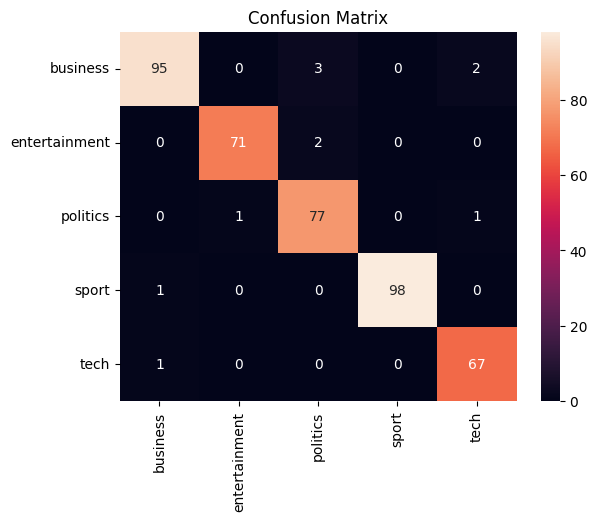

In [173]:
from sklearn.metrics import confusion_matrix

# Test set evaluation
y_pred = model.predict(X_test)
print("Test Performance:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.show()

## The Naive Bayes model achieves 97% accuracy on the test set

In [174]:
# Find Samples of misclassified examples
errors = test_df[y_pred != y_test]
for _, row in errors.sample(3).iterrows():
    print(f"\nTrue: {row['category']}, Predicted: {model.predict(tfidf.transform([row['processed']]))[0]}")
    print(f"Title: {row['title']}")
    print(f"Content: {row['content'][:200]}...")


True: business, Predicted: politics
Title: Call to overhaul UK state pension
Content:  The UK pension system has been branded inadequate and too complex by a leading retirement think-tank.  The Pensions Policy Institute (PPI) said replacing the state pension with a "citizen's pension" ...

True: entertainment, Predicted: politics
Title: Row threatens Hendrix museum plan
Content:  Proposals to open a museum dedicated to Jimi Hendrix are flailing because of a row over the home of his late father.  The run-down house in Seattle has already been moved wholesale once and local aut...

True: business, Predicted: politics
Title: Golden rule 'intact' says ex-aide
Content:  Chancellor Gordon Brown will meet his golden economic rule "with a margin to spare", according to his former chief economic adviser.  Formerly one of Mr Brown's closest Treasury aides, Ed Balls hinte...


#### We can see why it misclassified those examples, as that would even be hard for the average person to determine.

# Summary

This project implemented a **news topic classifier** achieving **97% accuracy** using:
- **Text Preprocessing**: NLTK lemmatization, stopword removal
- **Feature Engineering**: TF-IDF with bigrams
- **Model**: Multinomial Naive Bayes

Key steps:
1. Cleaned 266 duplicate articles
2. Engineered 5,000 TF-IDF features
3. Validated performance via stratified splits

The results demonstrate the effectiveness of traditional NLP methods for single-label classification on well-curated datasets.